In [41]:
import pandas as pd
from pyecharts import options as opts
from pyecharts.charts import Radar
from pyecharts.globals import ThemeType
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
file_name = './data/spotify_top50_2021.csv'

In [43]:
df = pd.read_csv(file_name, index_col=0)

## 1. Who are the top 10 artist in the dataset?

To determine the top 10 artists in the Spotify Top 50 songs dataset, we can create a bar chart that displays the number of songs for each artist, sorted in descending order. This will allow us to quickly identify the artists with the highest number of songs in the dataset.

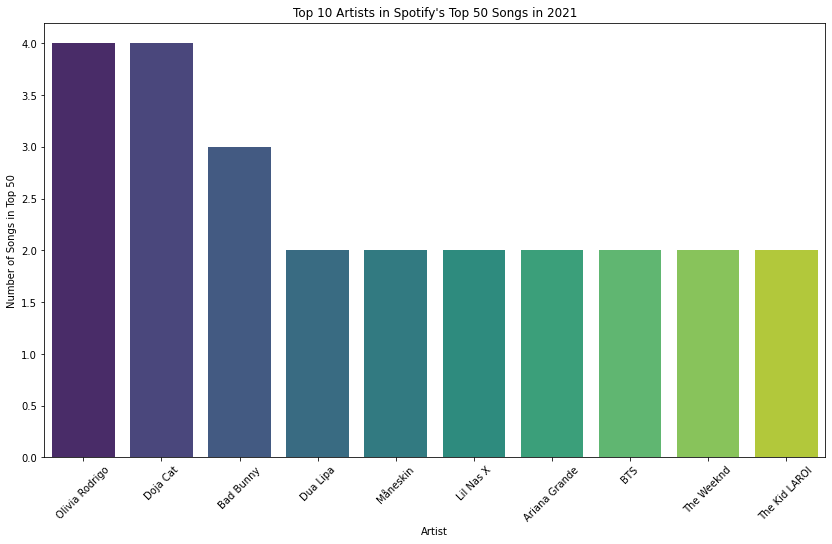

In [44]:
plt.figure(figsize=(14, 8))
# sns.set(style='whitegrid')

# Get the top 10 artists with the most songs in the top 50
top_artists = df['artist_name'].value_counts().head(10)

# Generate the bar chart
sns.barplot(x=top_artists.index, y=top_artists.values, palette='viridis')

# Customize the chart
plt.title("Top 10 Artists in Spotify's Top 50 Songs in 2021")
plt.ylabel('Number of Songs in Top 50')
plt.xlabel('Artist')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()

## 2. Top 10 artists by popularity and characteristics.

Here, we show the top 10 artists in the Spotify Top 50 songs dataset by popularity in bar chart. And in the same chart, also include characteristics such as the danceability and energy values for each song by artist. This will allow us to compare the characteristics of songs by each artist.

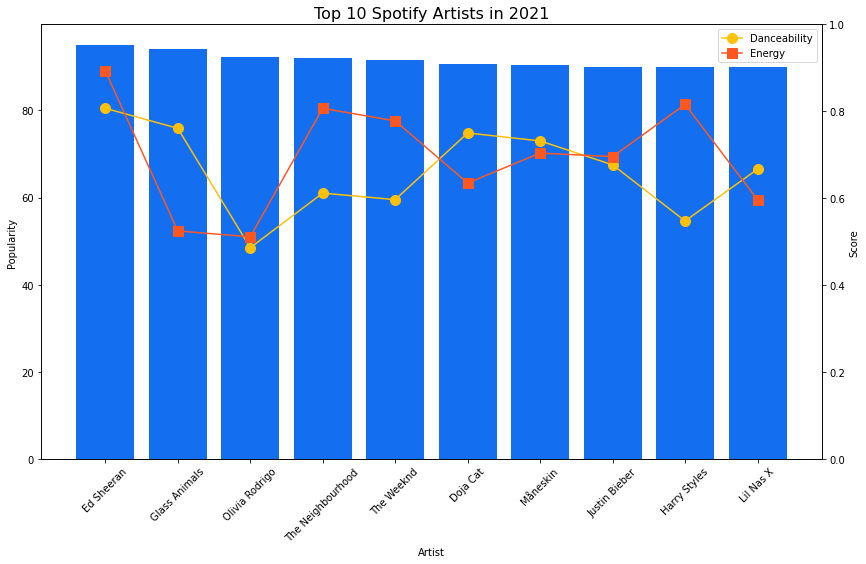

In [45]:
artist_df = df.groupby('artist_name', as_index=False).agg(
    {'popularity': 'mean', 'danceability': 'mean', 'energy': 'mean'})

# Sort by popularity and select top 10
artist_df = artist_df.sort_values('popularity', ascending=False).head(10)

# Create bar chart
fig, ax = plt.subplots(figsize=(14, 8))
ax.bar(artist_df['artist_name'], artist_df['popularity'], color='#136ff0')
ax.set_xlabel('Artist')
ax.set_xticks(range(len(artist_df)))
ax.set_xticklabels(artist_df['artist_name'], rotation=45)
ax.set_ylabel('Popularity')
ax.set_title('Top 10 Spotify Artists in 2021', fontsize=16)

# Create twin axis for danceability and energy
ax2 = ax.twinx()
ax2.plot(artist_df['artist_name'], artist_df['danceability'],
         color='#FFC107', marker='o', markersize=10, label='Danceability')
ax2.plot(artist_df['artist_name'], artist_df['energy'],
         color='#FF5722', marker='s', markersize=10, label='Energy')
ax2.set_ylim([0, 1])
ax2.set_ylabel('Score')
ax2.legend(loc='upper right')

plt.show()

## 3. How are the overall characteristics of the songs?
We will use a radar chart to show the overall characteristics of the songs in the Spotify Top 50 songs dataset. We create a radar chart that displays the values of several characteristics for each song. The characteristics we will consider are danceability, energy, speechiness, acousticness, and valence.

In [46]:
# Normalize the data
columns = ['danceability', 'energy', 'speechiness', 'acousticness', 'valence']
stat_df = df[columns].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
# Take means
stat_df = stat_df.mean()

# Show overall statistics in radar chart
radar = (
    Radar(init_opts=opts.InitOpts(theme=ThemeType.CHALK))
    .add_schema(
        schema=[
            opts.RadarIndicatorItem(name='Danceability', max_=1),
            opts.RadarIndicatorItem(name='Energy', max_=1),
            opts.RadarIndicatorItem(name='Speechiness', max_=1),
            opts.RadarIndicatorItem(name='Acousticness', max_=1),
            opts.RadarIndicatorItem(name='Valence', max_=1)
        ]
    )
    .add(
        series_name='Characteristics',
        data=[[round(v, 2) for v in stat_df.values.tolist()]],
        areastyle_opts=opts.AreaStyleOpts(opacity=0.5),
        linestyle_opts=opts.LineStyleOpts(width=2),
        label_opts=opts.LabelOpts(is_show=True)
    )
    .set_series_opts(
        itemstyle_opts={
            'normal': {
                'color': '#FF9F7D'
            }
        }
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(
            title='Spotify Top 50 Songs in 2021', subtitle='Overall Statistics'),
        legend_opts=opts.LegendOpts(
            type_='scroll', pos_left='5%', pos_bottom='5%')
    )
)

radar.render_notebook()